In [185]:
import numpy as np
import matplotlib.pyplot as plt

def showgrid(x):
    _, ax = plt.subplots()
    plt.imshow(x, cmap="gray_r")
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            ax.text(j, i, x[i,j], c="white")

def conv(x, f):
    f_f = f.ravel()
    f_s = f.shape[0]
    
    y = np.zeros((x.shape[0] - f_s + 1, x.shape[1] - f_s + 1))
    for i in range(x.shape[0] - f_s + 1):
        for j in range(x.shape[1] - f_s + 1):
            y[i,j] = np.dot(x[i:(i+f_s), j:(j+f_s)].ravel(), f_f)
    return y

def conv2(x, f):
    f_s = f.shape[0]
    steps = x.shape[0] - f_s + 1  # 2
    
    f_f = to_conv(f, x.shape[0], len(x.ravel()))
    y = np.dot(f_f, x.ravel().T)
    y = np.reshape(y, (steps, steps))
    return y

def to_conv(f, len_x, len_xf):
    f_s = f.shape[0]
    steps = len_x - f_s + 1  # 2
    f_f = np.zeros((steps*2, len_xf)) # (4, 16)
    jump = steps+f_s-1
    for r in range(steps): # row
        for c in range(steps): # column
            for i in range(f_s):
                start = i*jump + c + r*jump
                f_f[c+r*steps, start:(start+f_s)] = f[i, :]
    return f_f

def deconv2(y, f_f):
    f_t = f_f.T
    
    x_f = np.dot(f_t, y.ravel().T)
    x_s = int(np.sqrt(len(x_f)))
    x = np.reshape(x_f, (x_s, x_s))
    return x

def deconv_z(y, f_f):
    f = np.dot(f_f.T, f_f)
    f_inv = np.linalg.inv(f + np.eye(f.shape[0])*0.1)
    f_t = np.dot(f_inv, f_f.T)
    
    x_f = np.dot(f_t, y.ravel().T)
    x_s = int(np.sqrt(len(x_f)))
    x = np.reshape(x_f, (x_s, x_s))
    return x

image:


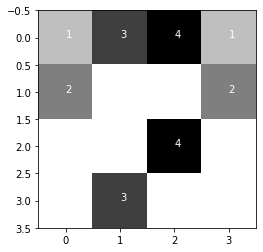

In [186]:
x_f = np.array([1, 3, 4, 1, 2, 0 ,0, 2, 0, 0, 4, 0, 0, 3, 0, 0])
x = np.reshape(x_f, (4, 4))
showgrid(x)
print("image:")

filter:


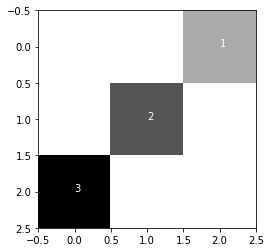

In [187]:
f_f = np.array([0, 0, 1, 0, 2, 0, 3, 0, 0])
f = np.reshape(f_f, (3,3))
showgrid(f)
print("filter:")

fmap:


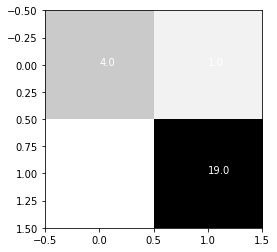

In [188]:
y = conv(x, f)
showgrid(y)
print("fmap:")

[[0. 0. 1. 0. 0. 2. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 2. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 3. 0. 0.]]
filter f:


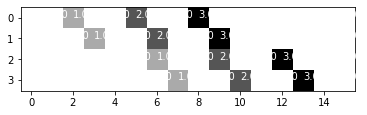

In [189]:
f_f = to_conv(f, x.shape[0], len(x.ravel()))
print(f_f)
showgrid(f_f)
print("filter f:")

[[ 4.  1.]
 [ 0. 19.]]
y:


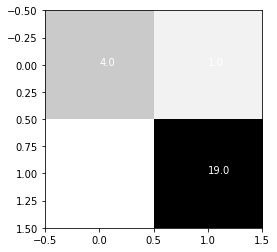

In [190]:
y = conv2(x,f)
print(y)
showgrid(y)
print("y:")

x deconv: [[ 0.  0.  4.  1.]
 [ 0.  8.  2. 19.]
 [12.  3. 38.  0.]
 [ 0. 57.  0.  0.]]


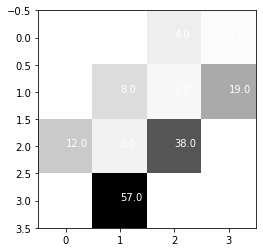

In [191]:
x = deconv2(y, f_f)
showgrid(x)
print("x deconv:", x)

x deconv: [[ 0.          0.          0.28368794  0.10459165]
 [ 0.          0.56737589  0.14984052  1.34751773]
 [ 0.85106383  0.19508939  2.69503546  0.        ]
 [-0.17802834  4.04255319  0.          0.        ]]


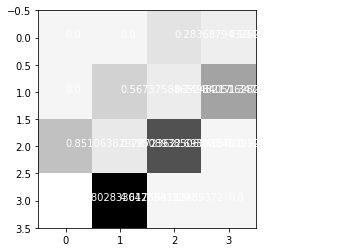

In [192]:
x = deconv_z(y, f_f)
showgrid(x)
print("x deconv:", x)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  4.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  5.  0.  0.  8.  0.  0.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  0.  3.  0.  0.]
 [ 0.  0.  3.  0.  0.  6.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  8.  0.  0. 13.  0.  0.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  4.  0.  0.  6.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.  0.  0.  6.  0.  0.  9.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  6.  0.  0.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

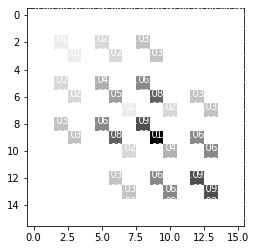

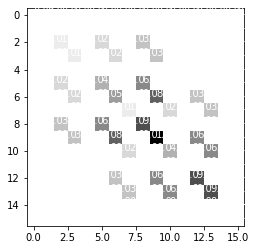

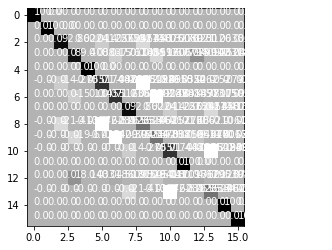

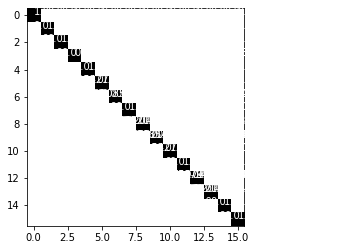

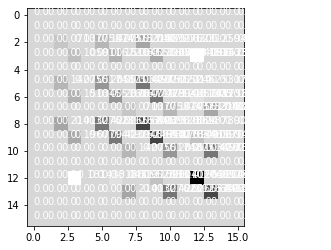

In [199]:
ff = np.dot(f_f.T, f_f)
showgrid(ff)
print(ff)

ffa = f + np.eye(f.shape[0])*0.01
showgrid(ffa)
print(ffa)

ffa_inv = np.linalg.inv(ffa)
showgrid(ffa_inv)
print(ffa_inv)

i = np.dot(ffa, ffa_inv)
showgrid(i)
print(i)

f_t = np.dot(ffa_inv, f_f.T)

i = np.dot(f_t, f_f)
showgrid(i)
print("i:", i)

i: [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.07137759  0.          0.          0.14275517
   0.          0.          0.21413276  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.10591162  0.          0.
   0.15134552  0.          0.          0.19677941  0.          0.
  -0.18143319  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.14275517  0.          0.          0.28551035


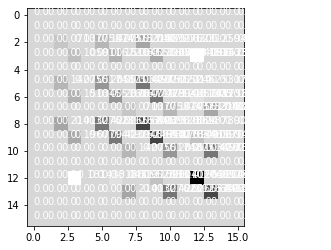

In [201]:
i = np.dot(np.dot(np.linalg.inv(np.dot(f_f.T, f_f) + np.eye(f.shape[0])*0.01), f_f.T), f_f)
showgrid(i)
print("i:", i)